 # Trail2
 ## Data Preparation and EDA 
 
      1. Dealling with a missing data by the following
           Filled in some missing values 
           Dropped some few missing values
      2. Dealing with categorical features by the following
           Creating a dummy variables

In [17]:
import pandas as pd
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

In [20]:
trn = pd.read_csv("C:\\AllamMarwa\\3- Side Projects\\Side Project - titanic\\Data\\1-train.csv")
tst_no_label = pd.read_csv("C:\\AllamMarwa\\3- Side Projects\\Side Project - titanic\\Data\\2-test.csv")
label = pd.read_csv("C:\\AllamMarwa\\3- Side Projects\\Side Project - titanic\\Data\\3-gender_submission.csv")
label.rename(columns={'PassengerId':'PassengerId_label'},inplace = True)
tst = pd.concat([tst_no_label,label],axis=1)
tst.drop('PassengerId_label',axis=1,inplace = True)

**Data Preparation and Imputation**

In [21]:
def impute(trn,Pclass):
    for i in trn.Pclass.unique():
        if pd.isnull(trn[trn.Pclass==i]["Age"]).sum()!=0:
            trn.Age.fillna(trn[trn.Pclass==i]["Age"].mean(),inplace=True)
        print (i)
    return trn

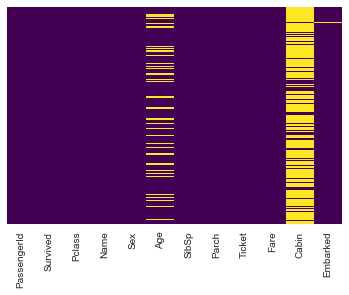

In [22]:
sns.heatmap(trn.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [23]:
train = impute(trn, trn.Pclass)

3
1
2


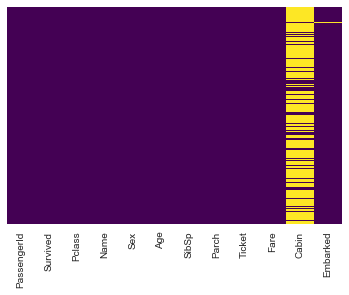

In [24]:
sns.heatmap(trn.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [25]:
test = impute(tst, tst.Pclass)

3
2
1


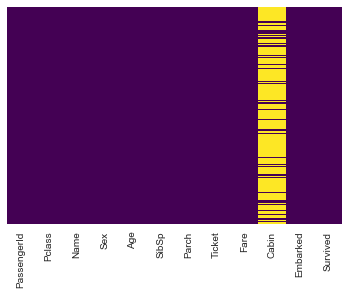

In [26]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [27]:
#def impute_test1(tst,Pclass):
 #   for i in tst.Pclass.unique():
#       if pd.isnull(tst[tst.Pclass==i]["Age"]).sum()!=0:
   #         tst.Age.fillna(tst[tst.Pclass==i]["Age"].mean(),inplace=True)
    #    print (i)
    #return tst

In [28]:
#test = impute_test1(tst, tst.Pclass)

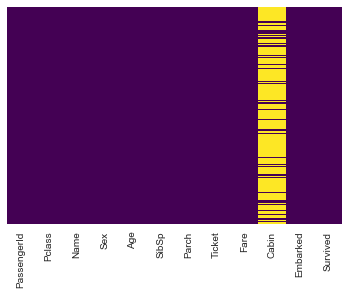

In [29]:
sns.heatmap(tst.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [30]:
#def impute1(data,var):
#    data1 = data
#    var1 = var
#    for i in data1.var1.unique():
#        if pd.isnull(data1[data1.var1==i]["Age"]).sum()!=0:
#            data1.Age.fillna(data1[data1.var1==i]["Age"].mean(),inplace=True)
#        print (i)
#    return data1

In [31]:
#data2 = impute1(titanic_train,titanic_train.Pclass)

In [32]:
train.drop('Cabin',axis=1,inplace = True)
test.drop('Cabin',axis=1 ,inplace = True)

In [33]:
train.dropna(inplace = True)
test.dropna(inplace = True)

**Dealing with categorical features**

In [34]:
Sex_train = pd.get_dummies(train[['Sex']],drop_first=True)
Sex_test = pd.get_dummies(test[['Sex']],drop_first=True)

In [35]:
Embarked_train = pd.get_dummies(train[['Embarked']],drop_first=True)
Embarked_test  = pd.get_dummies(test[['Embarked']],drop_first=True)

In [36]:
train = pd.concat([train, Sex_train, Embarked_train], axis=1)
test  = pd.concat([test, Sex_test, Embarked_test], axis=1)

In [38]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,0,1


In [39]:
train.drop(['Embarked','Sex','Name','Ticket'],axis =1,inplace=True)
test.drop(['Embarked','Sex','Name','Ticket'] ,axis =1, inplace=True)

**Export the data frame to csv**

In [45]:
train.to_csv(path_or_buf="C:\\AllamMarwa\\3- Side Projects\\Side Project - titanic\\Data\\train_trail_2.csv",index=False)

In [48]:
test.to_csv(path_or_buf="C:\\AllamMarwa\\3- Side Projects\\Side Project - titanic\\Data\\test_trail_2.csv", index= False)

In [46]:
pdd = pd.read_csv("C:\\AllamMarwa\\3- Side Projects\\Side Project - titanic\\Data\\train_trail_2.csv")

In [47]:
pdd.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
